In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from IPython.display import clear_output
from numpy.typing import NDArray
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

In [29]:
from qml.model.gate import get_gateset, Gate, GateInfo
from qml.model.unit import Unit, EmbedUnit, EntangleUnit
from qml.model.model import Model
from qml.tools.trainer import calc_gradients
from qml.tools.dataloader import DataLoader

In [54]:
%matplotlib inline
np.set_printoptions(precision=3, floatmode='fixed')

In [5]:
nq = 2
nx = 1
ng = 3
gateset = get_gateset(nq)

In [28]:
_PresetUnitInfo = namedtuple('PresetUnitInfo', ["gate_names", "qubits"])

class _EntangleUnit(Unit):

    NEIGHBOR_INFOS = {
        2: _PresetUnitInfo(
            ["cz"], [0]
        ),
        3: _PresetUnitInfo(
            ["cz", "cz", "cz"],
            [0, 1, 2]
        ),
    }

    def __init__(
            self,
            name: str,
            gates: list[Gate],
            params: list[Parameter],
            values: list[float] | NDArray,
    ):
        super().__init__(name, gates, params, values)

    @staticmethod
    def new_neighbor_cz(name: str, num_qubit: int, gateset: dict[str, GateInfo] = None):
        if gateset is None:
            gateset = get_gateset(num_qubit)
        infos = _EntangleUnit.NEIGHBOR_INFOS[num_qubit]
        return _EntangleUnit(name, _EntangleUnit._new_with_infos(infos, gateset), [], [])

    @staticmethod
    def _new_with_infos(infos, gateset):
        gate_infos: list[GateInfo] = [
            gateset[gname]
            for gname in infos.gate_names
        ]
        gates = [
            Gate.new_with_info(info, qubit)
            for info, qubit in zip(gate_infos, infos.qubits)
        ]
        return gates

In [30]:
ent_unit = EntangleUnit.new_neighbor_cz("ent1", nq, gateset=gateset)

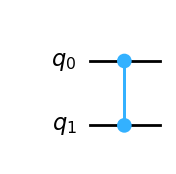

In [31]:
qc = QuantumCircuit(nq)
ent_unit.apply_to_qc(qc)
qc.draw("mpl")

In [32]:
emb_unit = EmbedUnit.generate_ry_arcsin_embed_unit("emb", nq, nx, gateset=gateset)

In [67]:
tr1_unit = Unit.generate_random_unit("tr1", nq, ng, gateset=gateset)

In [68]:
model = Model(nq, 1, emb_unit, [], [tr1_unit, ent_unit])

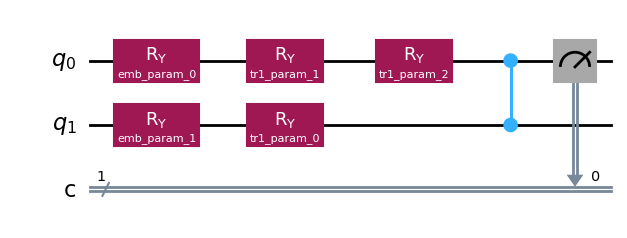

In [69]:
model.draw()